# Dogs classification

Authors: Michał Sułek, Andrzej Przybylski, Łukasz Kostrzewa, Patrycja Cieplicka
Date: 02.04.2021

In [1]:
import imagegenerator

import tensorflow as tf
from tensorflow.keras import layers
import models
from CAM import *

In [2]:
data_path = 'images/subset'
batch_size = 32

In [3]:
model = models.MobileNetV3((224,224),3)

In [4]:
model.build_mobileNetV3_2c(weights=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1024)              1529968   
_________________________________________________________________
reshape_18 (Reshape)         (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 1024)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 3)           3075      
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 1,533,043
Trainable params: 1,520,931
Non-trainable params: 12,112
_________________________________________

In [5]:
model.model_summary(detailed=True)

Model: "MobilenetV3small"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
___________________________________________________________________________________

In [6]:
image_generator = imagegenerator.ImageGenerator(data_path, validation_split=0.2, seed=123, batch_size=batch_size, image_size=(224,224))

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [8]:
history = model.train_with_generator(image_generator, 3, callbacks= [callback])

Found 465 images belonging to 3 classes.
Found 115 images belonging to 3 classes.
Epoch 1/3
15/15 [==============================] - 32s 2s/step - loss: 1.2496 - accuracy: 0.4209 - val_loss: 1.0985 - val_accuracy: 0.3478
Epoch 2/3
15/15 [==============================] - 18s 1s/step - loss: 0.9440 - accuracy: 0.5760 - val_loss: 1.0984 - val_accuracy: 0.3478
Epoch 3/3
15/15 [==============================] - 20s 1s/step - loss: 0.8545 - accuracy: 0.6004 - val_loss: 1.0984 - val_accuracy: 0.3478


In [ ]:
history = model.train_with_arrays(image_generator, 3)

Found 465 images belonging to 3 classes.


In [9]:
for layer in model.model.layers:
    print(layer.output)
    

KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 1024), dtype=tf.float32, name=None), name='reshape_18/Reshape:0', description="created by layer 'reshape_18'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 1024), dtype=tf.float32, name=None), name='dropout/Identity:0', description="created by layer 'dropout'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 3), dtype=tf.float32, name=None), name='conv2d/BiasAdd:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='activation/Softmax:0', description="created by layer 'activation'")


In [37]:
last_layer = model.model.get_layer('dropout')
x, y = image_generator.test_array(4)


Found 143 files belonging to 3 classes.


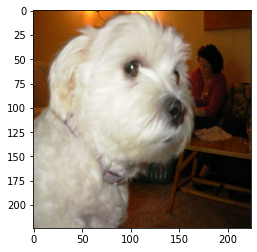

In [38]:
import matplotlib.pyplot as plt
plt.imshow(x[34])
preds = model.model.predict(x)

In [39]:
from tensorflow import keras
import numpy as np

In [40]:
import numpy as np
ex_dogo = model.model.output[:, np.argmax(preds[0])]
print(ex_dogo)


KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.float32, name=None), name='tf.__operators__.getitem_2/strided_slice:0', description="created by layer 'tf.__operators__.getitem_2'")


In [41]:
img_array = keras.preprocessing.image.img_to_array(x[34])
img_array = np.expand_dims(img_array, axis=0)

In [54]:
img_array, labels = image_generator.test_array(1)

Found 143 files belonging to 3 classes.


In [55]:
img_array.shape

(32, 224, 224, 3)

In [57]:
preds = model.model.predict(img_array)
print(preds)
labels

[[0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33128443]
 [0.33752742 0.33118817 0.33

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [61]:
heatmap = make_gradcam_heatmap(img_array, model.base_model, 'multiply_18')

In [62]:
print(heatmap)

[[0.4236988  0.62119573 0.55754536 0.48782125 0.44978487 0.46300477
  0.4617819 ]
 [0.757275   0.94894016 0.21855783 0.16086115 0.16313727 0.15056252
  0.28599283]
 [0.8405747  1.         0.9309633  0.24188617 0.16260728 0.22787105
  0.55729616]
 [0.73779935 0.98762214 0.85495347 0.5022478  0.18227433 0.41317168
  0.57278156]
 [0.72410405 0.9036243  0.75100255 0.46354887 0.16512334 0.4926467
  0.54224056]
 [0.75236475 0.85396636 0.52248746 0.44579887 0.20873623 0.44942018
  0.7220441 ]
 [0.65147495 0.51223147 0.52671903 0.48353535 0.48059693 0.46920505
  0.8397965 ]]


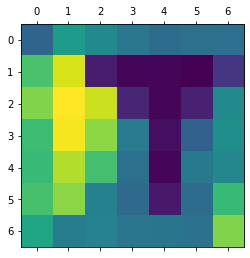

In [63]:
plt.matshow(heatmap)
plt.show()

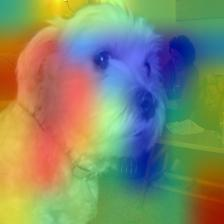

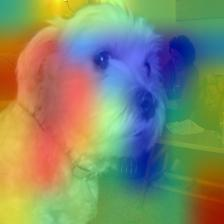

In [64]:
save_and_display_gradcam(x[34], heatmap, alpha = 0.005)